In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel("Churn_Data.xlsx",sheet_name='vw_ChurnData')

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   74594-TEL    Male   24      No      Telangana                    9   
1   74656-ASS  Female   74      No          Assam                   11   
2   74664-UTT  Female   44     Yes  Uttar Pradesh                    0   
3   74667-TAM  Female   45     Yes     Tamil Nadu                   14   
4   74668-MAH    Male   24     Yes    Maharashtra                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                12        NaN           Yes            Yes  ...   
1                24        NaN           Yes            Yes  ...   
2                23        NaN           Yes             No  ...   
3                31     Deal 1           Yes             No  ...   
4                 9        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      84.650002     84.650002          0.00   
1  Bank Withdraw

In [4]:
#Data Preprocessing

# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[821  48]
 [122 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       869
           1       0.81      0.63      0.71       333

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.86      0.86      0.85      1202



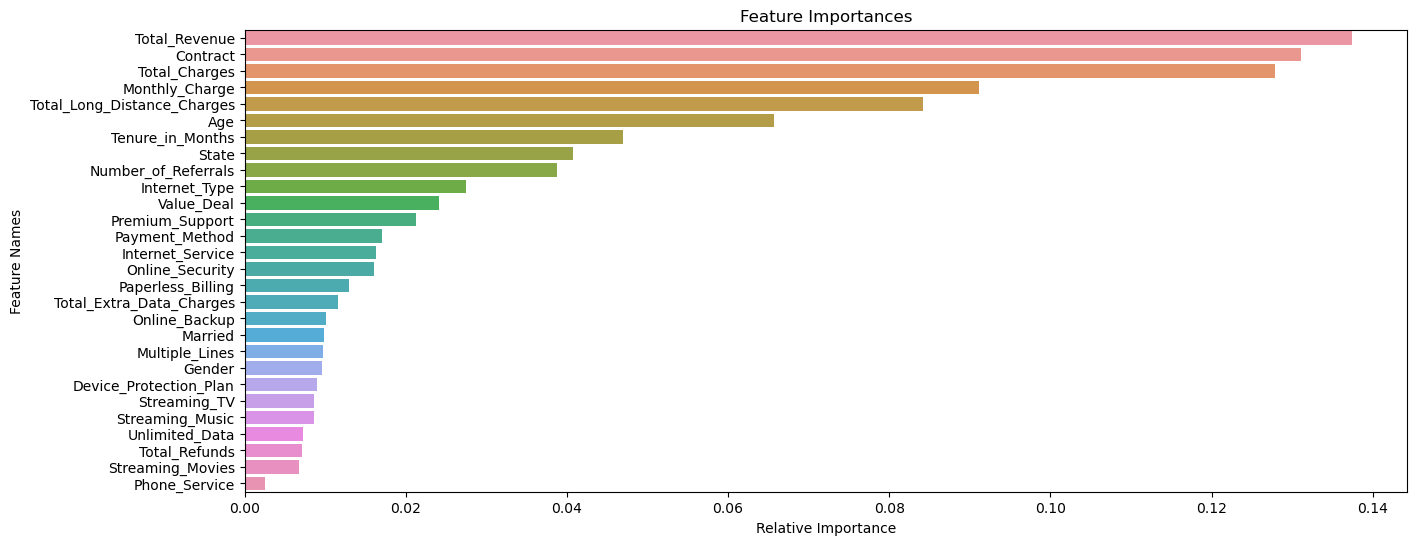

In [6]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [12]:
# Use Model for Prediction on New Data

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel("Churn_Data.xlsx", sheet_name='vw_JoinData')

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy() 

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
    
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv("Predictions.csv", index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   74651-WES  Female   30     Yes     West Bengal                    7   
1   78021-UTT  Female   45     Yes   Uttar Pradesh                   12   
2   82427-MAH    Male   36      No     Maharashtra                   15   
3   82473-AND    Male   63     Yes  Andhra Pradesh                   10   
4   82559-CHH    Male   34     Yes    Chhattisgarh                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                23        NaN            No             No  ...   
1                35     Deal 5           Yes            Yes  ...   
2                28     Deal 5           Yes             No  ...   
3                 1     Deal 5            No             No  ...   
4                33     Deal 5           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      29.200001     98.500000           0.0   
1    Credit Ca